---
# Ejercicio 9
Escriba tres programas para generar un variable aleatoria normal patrón, usando:

**a)** generación de variables exponenciales según el ejemplo 5 f del libro Simulacion de S. M. Ross,

**b)** el método polar,

**c)** el método de razón entre uniformes

Pruebe los códigos calculando la media muestral y varianza muestral de 10.000 valores generados con los
tres métodos.

Inicialmente tenemos que la densidad de una variable aleatoria con distribución normal es tal que:
$$
f(x) = \frac{2}{\sqrt{2\pi}} \cdot e^{\frac{-x²}{2}} \quad 0<x<\infty
$$

In [1]:
from typing import Callable
from random import random
from time import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log, e
sns.set_theme(style="darkgrid")

---
# Método de rechazo

Fuente 🌎: [Simulación - Sheldon M. Ross](https://eprints.uad.ac.id/13/1/Sheldon_M._Ross_-_Simulation.pdf)

Para el punto **a)**, "Utilizando la generación de variables exponenciales", no es nada más que generar una normal patrón, utilizando el método de rechazo donde $g(x)=e^x, \quad 0<x<\infty$; $g$ función de densidad exponencial con tasa 1.


Sea $h(x) = \frac{f(x)}{g(x)}$ tal que:
$$
h(x) = \sqrt{\frac{2}{\pi}} e^{x-\frac{x^2}{2}}
$$

Luego el *valor máximo de x*, se encuentra cuando maximizamos $x-\frac{x²}{2}$

El cálculo muestra que esto ocurre cuando $x=1$, y entonces podemos tomar:
$$
c = max\frac{f(x)}{g(x)} = \frac{f(1)}{g(1)}=\sqrt{\frac{2e}{\pi}}
$$

Porque
$$
\begin{align*}
    \frac{f(x)}{cg(x)} &= exp\bigg\{x-\frac{x²}{2}-\frac{1}{2}\bigg\}\\[0.4cm]
    &= exp\bigg\{-\frac{(x-1)²}{2}\bigg\}
\end{align*}
$$

Luego el método de rechazo simula $Y_1 \thicksim \mathcal{E}(1), U$ uniforme, e itera hasta que:
$$
U \leq exp\bigg\{-\frac{(Y_1-1)²}{2}\bigg\}
$$

es decir:
$$
log(U) \leq -\frac{(Y_1 -1)^2}{2} \text{ o equivalentemente} -log \geq \frac{(Y_1 - 1)²}{2}
$$

Como $Y_2 = -log(U)$ genera una exponencial $\mathcal{E}(1)$, el algoritmo por el método de rechazo para generar Z se traduce en:

In [2]:
def ZMR(mu:float, sigma:float) -> float:
    """
    Generación de variable aleatoria con distribución normal

    Args:
        mu (float): Parámetro de la distribución
        sigma (float): Parámetro de la distribución

    Returns:
        float: Valor aleatorio
    """
    while True:
        Y1 = -log(random())
        Y2 = -log(random())
        if Y2 >= (Y1-1) ** 2 / 2:
            if random() < 0.5:
                return Y1 * sigma + mu
            return -Y1 * sigma + mu

---
# Comparaciones gráficas

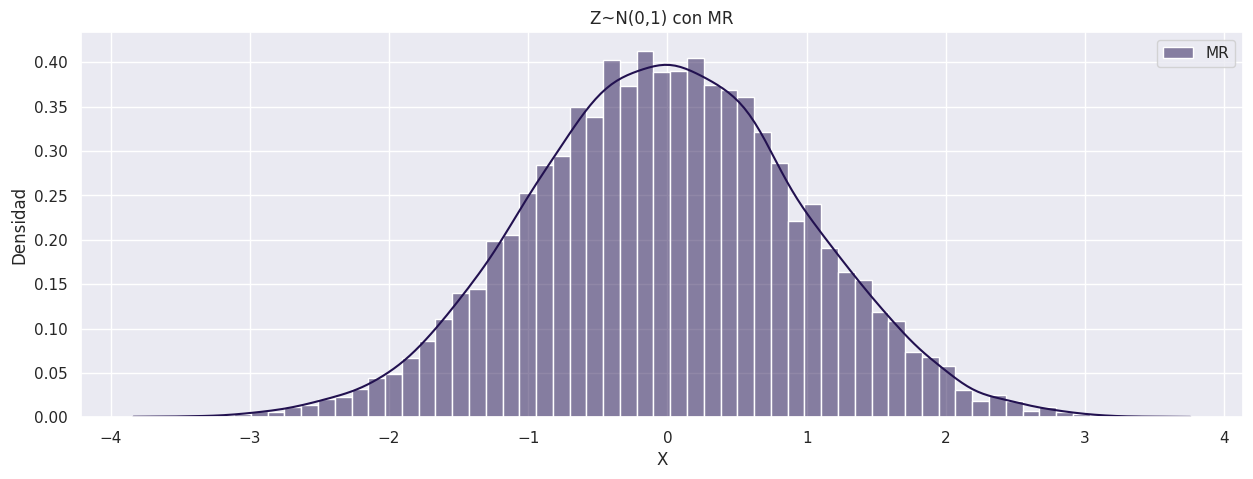

In [8]:
Nsim = 10_000
ZMR_samples = [ZMR(mu=0, sigma=1) for _ in range(Nsim)]

pallete = sns.color_palette("magma")

fig, axes = plt.subplots(1,1, figsize=(15,5))
sns.histplot(ZMR_samples, stat='density', color=pallete[0], label="MR", kde=True)
axes.set_title("Z~N(0,1) con MR")
axes.legend()
axes.set_xlabel("X")
axes.set_ylabel("Densidad")

plt.show()
